In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Set Max display rows and columns
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Import the data
housing_df = pd.read_csv("Resources/housing_df_clean.csv")
housing_df.head()
print("Input file has been read in")

Input file has been read in


In [4]:
# Get shape of housing dataframe
housing_df.shape

(1460, 56)

In [5]:
# Get dataframe field information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  ExterQua

In [6]:
# Get value counts for all housing_df columns
for col in housing_df.columns:
    print(f'-------------------- {col} START --------------------')
    print(housing_df[col].value_counts(dropna=False))
    print(f'-------------------- {col} END ----------------------')
    print('\n')

print("Value counts for all housing_df columns Complete")

-------------------- MSSubClass START --------------------
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
-------------------- MSSubClass END ----------------------


-------------------- MSZoning START --------------------
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
-------------------- MSZoning END ----------------------


-------------------- LotFrontage START --------------------
LotFrontage
70.0     329
60.0     143
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      1

In [7]:
# List housing dataframe columns
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## Split into training and testing sets

In [8]:
# Make an X variable with all columns except SalePrice
X = housing_df.drop(columns = ['SalePrice'])
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# Set the target variable y
y = housing_df['SalePrice']

In [10]:
# Now split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create list of category columns that need to be encoded
cols_to_encode = ['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional',
                  'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition']

# Create an instance of the label encoder
le = LabelEncoder()

# Copy X_train and X_test before encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Fit and transform the label encoder with X_train for each column
# Transform X_test with the label encoder for each column
for col in cols_to_encode:
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    
print('---------- X_train_encoded ----------')
print(X_train_encoded.head())
print('\n')
print('---------- X_test_encoded ----------')
print(X_test_encoded.head())

---------- X_train_encoded ----------
      MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
1023         120         3         43.0     3182         3          4   
810           20         3         78.0    10140         3          4   
1384          50         3         60.0     9060         3          4   
626           20         3         70.0    12342         0          4   
813           20         3         75.0     9750         3          4   

      LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  OverallQual  \
1023          0             0           2         4           2            7   
810           0            14           2         0           2            6   
1384          0             7           2         0           0            6   
626           0            12           2         0           2            5   
813           0            12           2         0           2            6   

      OverallCond  YearBuilt  YearRemodAdd

## Train the models

In [12]:
# Create the models
lr1 = LinearRegression()

# Fit the first model to the full training data. 
lr1.fit(X_train_encoded, y_train)


LinearRegression()

## Evaluate the model

In [13]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our models to make prediction
predicted = lr1.predict(X_test_encoded)

# Score the prediction with mse and r2
mse1 = mean_squared_error(y_test, predicted)
r21 = r2_score(y_test, predicted)

print(f"All Features:")
print(f"mean squared error (MSE): {mse1}")
print(f"R-squared (R2): {r21}")


All Features:
mean squared error (MSE): 1127178340.6054568
R-squared (R2): 0.8390965577415814


In [14]:
# Create the adjusted r-squared function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [15]:
# Calculate the adjusted r-squared value of the model
adj_score1 = r2_adj(X_test_encoded, y_test, lr1)
print(f"All Features Adjusted R2: {adj_score1}")


All Features Adjusted R2: 0.8104567864658112


In [16]:
# Examine linear regression on the better training data using cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LinearRegression(), X_train_encoded, y_train, scoring = "r2")
print(f"All scores: {cv_scores}")
print(f"Mean score: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

All scores: [0.82240139 0.15877784 0.80448671 0.85297087 0.88657705]
Mean score: 0.7050427684133591
Standard Deviation: 0.2745559809024014


In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from xgboost import XGBRegressor

Using Ridge, XGBOOST, LIGHTGBM, and CatBOOST Regression Models 

In [18]:
# Select categorical columns
categorical_cols = housing_df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
housing_df_encoded = pd.get_dummies(housing_df, columns=categorical_cols, drop_first=True)

# Split the data into features (X) and target (y)
X = housing_df_encoded.drop(columns=['SalePrice'])
y = housing_df_encoded['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge regression model
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Display the results
print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.8701005245526976
Mean Absolute Error: 20022.542393438132
Mean Squared Error: 996371350.8233047
Root Mean Squared Error: 31565.35047838539


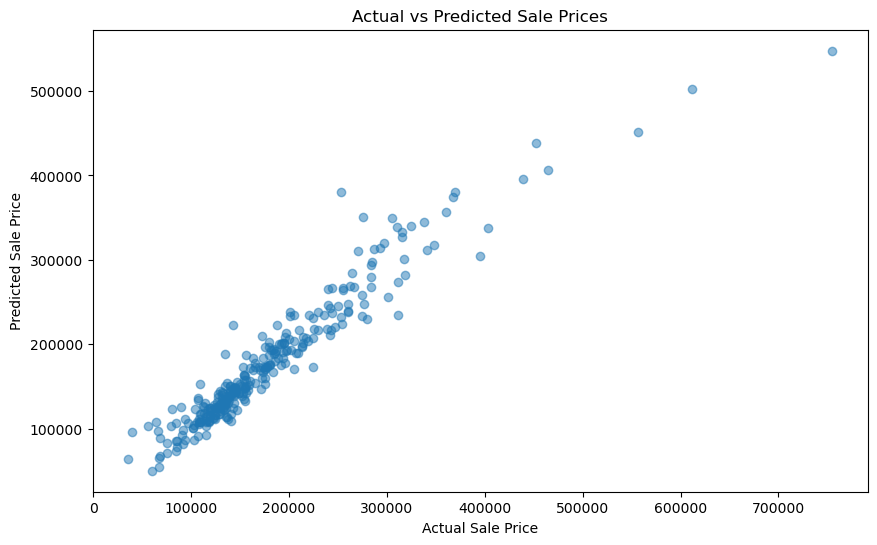

In [29]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

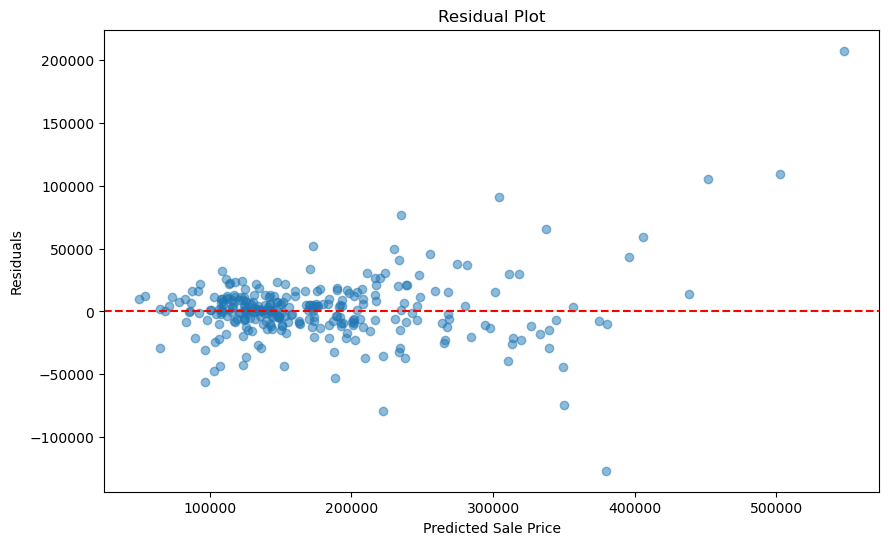

In [30]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

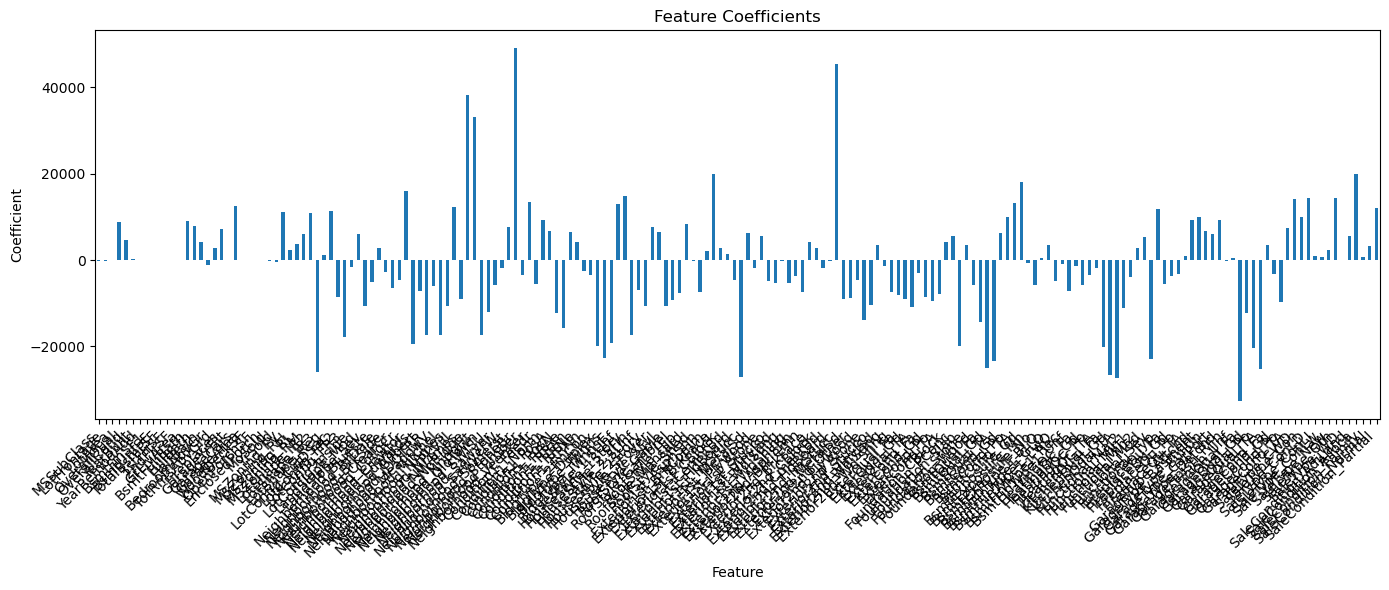

In [40]:
#layout too busy..Don't Really Need, Just to look at. Could use with P-Values and reduced Columns

coefficients.plot(kind='bar', figsize=(14, 6))
plt.title('Feature Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [19]:
# Cross-validate the model to get an idea of its generalization performance
# Perform 5-fold cross-validation
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean Cross-validated MSE: {mean_score}")
print(f"Standard Deviation of Cross-validated MSE: {std_score}")

Mean Cross-validated MSE: -1144683524.5259392
Standard Deviation of Cross-validated MSE: 559058691.5132115


In [20]:
# Create an instance of XGBoost regression
xgb_reg = XGBRegressor()

# Fit the model on the training data
xgb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.8994424955832344
Mean Absolute Error: 17802.725906999145
Mean Squared Error: 771308861.457252
Root Mean Squared Error: 27772.447883779565


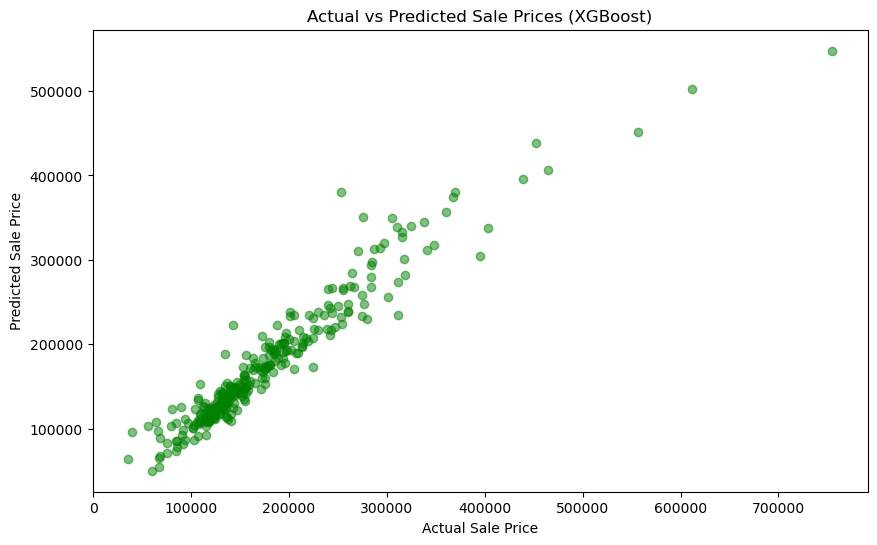

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='green')  
plt.title('Actual vs Predicted Sale Prices (XGBoost)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

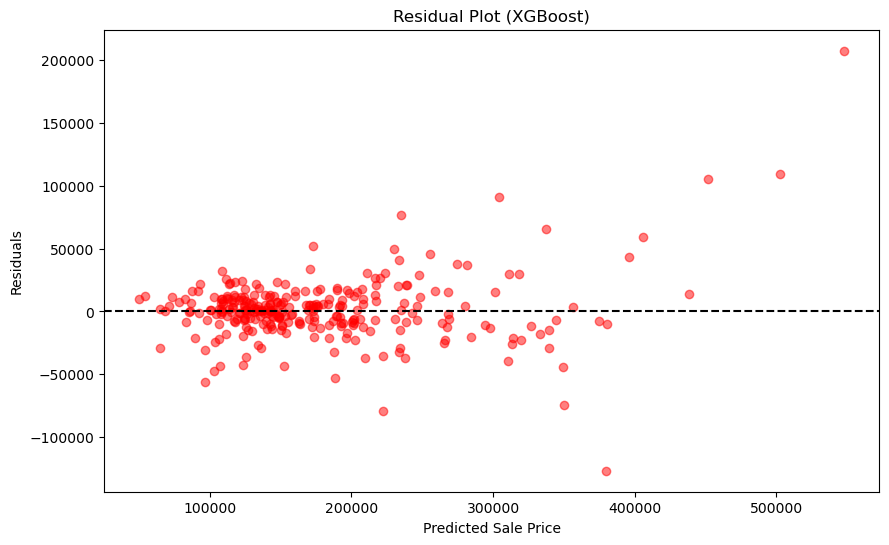

In [35]:
# Calculate residuals
residuals_xgb = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_xgb, alpha=0.5, c='red')  
plt.title('Residual Plot (XGBoost)')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')  
plt.show()

In [21]:
# Perform 5-fold cross-validation
scores = cross_val_score(xgb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean Cross-validated MSE: {mean_score}")
print(f"Standard Deviation of Cross-validated MSE: {std_score}")

Mean Cross-validated MSE: -1037730403.1360499
Standard Deviation of Cross-validated MSE: 293236731.73730946


In [22]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [23]:
# Create an instance of LightGBM regression
lgbm_reg = LGBMRegressor()

# Fit the model on the training data
lgbm_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgbm_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 128
[LightGBM] [Info] Start training from score 181441.541952
R-squared: 0.8902009902782724
Mean Absolute Error: 16655.51233565537
Mean Squared Error: 842194221.7917616
Root Mean Squared Error: 29020.58272660564


In [24]:
# Perform 5-fold cross-validation
scores = cross_val_score(lgbm_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean Cross-validated MSE: {mean_score}")
print(f"Standard Deviation of Cross-validated MSE: {std_score}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2704
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 123
[LightGBM] [Info] Start training from score 181121.274090
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2704
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 125
[LightGBM] [Info] Start training from score 179912.635974
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[Lig

In [25]:
# Create an instance of CatBoost regression
catboost_reg = CatBoostRegressor()

# Fit the model on the training data
catboost_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = sqrt(mse)

print(f"R-squared: {r_squared}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



Learning rate set to 0.04196
0:	learn: 75224.3696124	total: 153ms	remaining: 2m 33s
1:	learn: 73268.3105026	total: 162ms	remaining: 1m 20s
2:	learn: 71473.3181642	total: 170ms	remaining: 56.6s
3:	learn: 69629.3880471	total: 178ms	remaining: 44.3s
4:	learn: 67877.7720979	total: 186ms	remaining: 37s
5:	learn: 66140.2225311	total: 193ms	remaining: 32.1s
6:	learn: 64501.8990057	total: 201ms	remaining: 28.5s
7:	learn: 63022.2147485	total: 209ms	remaining: 26s
8:	learn: 61567.9251071	total: 216ms	remaining: 23.8s
9:	learn: 60223.9556357	total: 222ms	remaining: 22s
10:	learn: 58827.6641485	total: 229ms	remaining: 20.6s
11:	learn: 57585.4918312	total: 235ms	remaining: 19.3s
12:	learn: 56224.3058048	total: 242ms	remaining: 18.4s
13:	learn: 54984.4867961	total: 248ms	remaining: 17.5s
14:	learn: 53806.3105506	total: 254ms	remaining: 16.7s
15:	learn: 52571.4648266	total: 260ms	remaining: 16s
16:	learn: 51421.3938169	total: 266ms	remaining: 15.4s
17:	learn: 50297.2231048	total: 272ms	remaining: 14.

152:	learn: 18159.0141952	total: 833ms	remaining: 4.61s
153:	learn: 18094.6236525	total: 838ms	remaining: 4.6s
154:	learn: 18052.6665836	total: 843ms	remaining: 4.6s
155:	learn: 17983.8788307	total: 848ms	remaining: 4.58s
156:	learn: 17956.7549038	total: 853ms	remaining: 4.58s
157:	learn: 17894.9781291	total: 858ms	remaining: 4.57s
158:	learn: 17875.5626912	total: 862ms	remaining: 4.56s
159:	learn: 17814.4952639	total: 867ms	remaining: 4.55s
160:	learn: 17783.9188446	total: 871ms	remaining: 4.54s
161:	learn: 17768.2224803	total: 876ms	remaining: 4.53s
162:	learn: 17752.2593732	total: 880ms	remaining: 4.52s
163:	learn: 17723.9770091	total: 884ms	remaining: 4.5s
164:	learn: 17684.0474751	total: 888ms	remaining: 4.49s
165:	learn: 17663.8064247	total: 892ms	remaining: 4.48s
166:	learn: 17651.1222934	total: 895ms	remaining: 4.47s
167:	learn: 17616.6576304	total: 899ms	remaining: 4.45s
168:	learn: 17558.8538888	total: 902ms	remaining: 4.44s
169:	learn: 17527.5562267	total: 906ms	remaining: 4

323:	learn: 13337.1717446	total: 1.44s	remaining: 3s
324:	learn: 13332.0594493	total: 1.44s	remaining: 3s
325:	learn: 13312.4548105	total: 1.45s	remaining: 2.99s
326:	learn: 13292.8481087	total: 1.45s	remaining: 2.98s
327:	learn: 13264.5395044	total: 1.45s	remaining: 2.98s
328:	learn: 13260.0588877	total: 1.46s	remaining: 2.97s
329:	learn: 13240.3539793	total: 1.46s	remaining: 2.97s
330:	learn: 13233.3218601	total: 1.47s	remaining: 2.96s
331:	learn: 13216.5458508	total: 1.47s	remaining: 2.96s
332:	learn: 13203.9004291	total: 1.47s	remaining: 2.95s
333:	learn: 13169.8457020	total: 1.48s	remaining: 2.95s
334:	learn: 13164.6959890	total: 1.48s	remaining: 2.94s
335:	learn: 13149.1814028	total: 1.49s	remaining: 2.94s
336:	learn: 13115.8668368	total: 1.49s	remaining: 2.93s
337:	learn: 13084.2440159	total: 1.49s	remaining: 2.92s
338:	learn: 13065.7822941	total: 1.5s	remaining: 2.92s
339:	learn: 13052.9331339	total: 1.5s	remaining: 2.91s
340:	learn: 13035.5653392	total: 1.5s	remaining: 2.91s
3

480:	learn: 10545.8571558	total: 2.04s	remaining: 2.2s
481:	learn: 10534.6190511	total: 2.04s	remaining: 2.19s
482:	learn: 10526.2421717	total: 2.05s	remaining: 2.19s
483:	learn: 10506.7234297	total: 2.05s	remaining: 2.19s
484:	learn: 10480.3379117	total: 2.05s	remaining: 2.18s
485:	learn: 10461.8226742	total: 2.06s	remaining: 2.18s
486:	learn: 10445.3507918	total: 2.06s	remaining: 2.17s
487:	learn: 10426.0131914	total: 2.06s	remaining: 2.17s
488:	learn: 10410.9489044	total: 2.07s	remaining: 2.16s
489:	learn: 10396.5057027	total: 2.07s	remaining: 2.16s
490:	learn: 10389.0671747	total: 2.08s	remaining: 2.15s
491:	learn: 10372.4922500	total: 2.08s	remaining: 2.15s
492:	learn: 10360.8379829	total: 2.08s	remaining: 2.14s
493:	learn: 10346.0625979	total: 2.09s	remaining: 2.14s
494:	learn: 10327.2264741	total: 2.09s	remaining: 2.13s
495:	learn: 10311.5273352	total: 2.1s	remaining: 2.13s
496:	learn: 10292.4508212	total: 2.1s	remaining: 2.12s
497:	learn: 10270.7013498	total: 2.1s	remaining: 2.

636:	learn: 8572.9318784	total: 2.64s	remaining: 1.5s
637:	learn: 8565.7729217	total: 2.64s	remaining: 1.5s
638:	learn: 8555.7641506	total: 2.65s	remaining: 1.5s
639:	learn: 8546.6147542	total: 2.65s	remaining: 1.49s
640:	learn: 8533.0845449	total: 2.65s	remaining: 1.49s
641:	learn: 8523.1459184	total: 2.66s	remaining: 1.48s
642:	learn: 8520.6555470	total: 2.66s	remaining: 1.48s
643:	learn: 8506.0965662	total: 2.67s	remaining: 1.47s
644:	learn: 8495.1625702	total: 2.67s	remaining: 1.47s
645:	learn: 8483.3816094	total: 2.67s	remaining: 1.47s
646:	learn: 8471.8722670	total: 2.68s	remaining: 1.46s
647:	learn: 8462.1810837	total: 2.68s	remaining: 1.46s
648:	learn: 8452.5077217	total: 2.68s	remaining: 1.45s
649:	learn: 8439.3638333	total: 2.69s	remaining: 1.45s
650:	learn: 8426.4741931	total: 2.69s	remaining: 1.44s
651:	learn: 8414.0030196	total: 2.69s	remaining: 1.44s
652:	learn: 8386.4829603	total: 2.7s	remaining: 1.43s
653:	learn: 8383.0646558	total: 2.7s	remaining: 1.43s
654:	learn: 836

796:	learn: 7060.7742196	total: 3.25s	remaining: 827ms
797:	learn: 7053.1357100	total: 3.25s	remaining: 823ms
798:	learn: 7042.0233688	total: 3.26s	remaining: 819ms
799:	learn: 7022.2841334	total: 3.27s	remaining: 817ms
800:	learn: 7011.5623578	total: 3.27s	remaining: 813ms
801:	learn: 7007.0990645	total: 3.28s	remaining: 809ms
802:	learn: 7002.9523588	total: 3.28s	remaining: 805ms
803:	learn: 6993.2766235	total: 3.29s	remaining: 801ms
804:	learn: 6980.5662921	total: 3.29s	remaining: 797ms
805:	learn: 6972.9498816	total: 3.29s	remaining: 793ms
806:	learn: 6963.6922019	total: 3.3s	remaining: 789ms
807:	learn: 6957.8013862	total: 3.3s	remaining: 785ms
808:	learn: 6956.5369288	total: 3.31s	remaining: 780ms
809:	learn: 6946.8099769	total: 3.31s	remaining: 776ms
810:	learn: 6936.4620377	total: 3.31s	remaining: 772ms
811:	learn: 6931.5996767	total: 3.32s	remaining: 768ms
812:	learn: 6920.5025125	total: 3.32s	remaining: 764ms
813:	learn: 6916.5389647	total: 3.32s	remaining: 759ms
814:	learn: 

950:	learn: 5928.4566037	total: 3.86s	remaining: 199ms
951:	learn: 5926.9642721	total: 3.86s	remaining: 195ms
952:	learn: 5920.7144366	total: 3.87s	remaining: 191ms
953:	learn: 5912.6697084	total: 3.87s	remaining: 187ms
954:	learn: 5905.8610513	total: 3.87s	remaining: 182ms
955:	learn: 5905.2948172	total: 3.88s	remaining: 178ms
956:	learn: 5896.4307612	total: 3.88s	remaining: 174ms
957:	learn: 5887.6379326	total: 3.88s	remaining: 170ms
958:	learn: 5883.0246385	total: 3.89s	remaining: 166ms
959:	learn: 5882.6565005	total: 3.89s	remaining: 162ms
960:	learn: 5872.3437326	total: 3.9s	remaining: 158ms
961:	learn: 5864.5301194	total: 3.9s	remaining: 154ms
962:	learn: 5857.6278393	total: 3.9s	remaining: 150ms
963:	learn: 5851.1406354	total: 3.91s	remaining: 146ms
964:	learn: 5842.3087868	total: 3.91s	remaining: 142ms
965:	learn: 5832.9046415	total: 3.92s	remaining: 138ms
966:	learn: 5824.9381108	total: 3.92s	remaining: 134ms
967:	learn: 5810.8691633	total: 3.92s	remaining: 130ms
968:	learn: 5

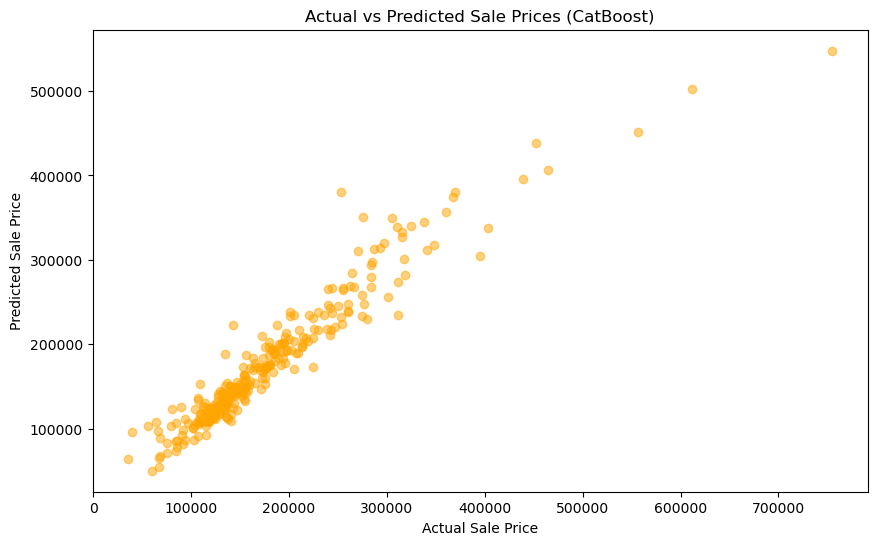

In [36]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='orange')  # Change 'orange' to any color you prefer
plt.title('Actual vs Predicted Sale Prices (CatBoost)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

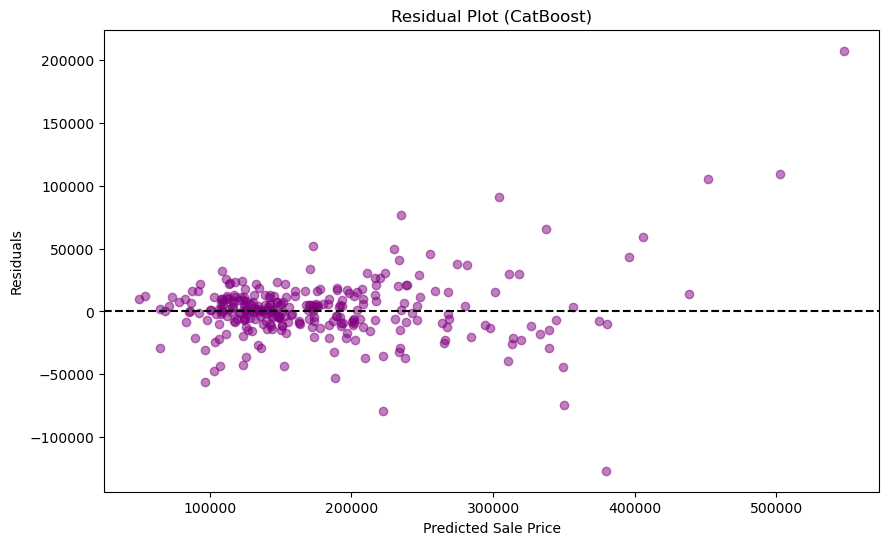

In [37]:
# Calculate residuals
residuals_catboost = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals_catboost, alpha=0.5, c='purple') 
plt.title('Residual Plot (CatBoost)')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')  
plt.show()

In [26]:
# Perform 5-fold cross-validation
scores = cross_val_score(catboost_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Mean Cross-validated MSE: {mean_score}")
print(f"Standard Deviation of Cross-validated MSE: {std_score}")

Learning rate set to 0.040504
0:	learn: 74090.6504755	total: 5.23ms	remaining: 5.22s
1:	learn: 72354.1761046	total: 9.33ms	remaining: 4.66s
2:	learn: 70555.1604693	total: 15.4ms	remaining: 5.12s
3:	learn: 68666.9899038	total: 20.3ms	remaining: 5.05s
4:	learn: 67101.5871392	total: 25.7ms	remaining: 5.11s
5:	learn: 65481.8288490	total: 32.3ms	remaining: 5.34s
6:	learn: 63924.6573985	total: 39.5ms	remaining: 5.6s
7:	learn: 62419.3029135	total: 46ms	remaining: 5.71s
8:	learn: 61107.2692495	total: 53.1ms	remaining: 5.85s
9:	learn: 59764.1778021	total: 61.7ms	remaining: 6.11s
10:	learn: 58496.5614645	total: 68.9ms	remaining: 6.2s
11:	learn: 57334.4262103	total: 76.1ms	remaining: 6.26s
12:	learn: 56217.1072755	total: 83ms	remaining: 6.3s
13:	learn: 55124.6344313	total: 90.1ms	remaining: 6.35s
14:	learn: 54056.8816332	total: 97.3ms	remaining: 6.39s
15:	learn: 52944.0038589	total: 105ms	remaining: 6.45s
16:	learn: 51754.5302142	total: 111ms	remaining: 6.45s
17:	learn: 50685.7867704	total: 117ms

159:	learn: 17859.1743880	total: 714ms	remaining: 3.75s
160:	learn: 17826.8657383	total: 719ms	remaining: 3.75s
161:	learn: 17768.4506925	total: 724ms	remaining: 3.75s
162:	learn: 17739.6731067	total: 730ms	remaining: 3.75s
163:	learn: 17686.7796051	total: 735ms	remaining: 3.74s
164:	learn: 17626.2621931	total: 739ms	remaining: 3.74s
165:	learn: 17571.2914797	total: 743ms	remaining: 3.73s
166:	learn: 17555.5864732	total: 747ms	remaining: 3.73s
167:	learn: 17514.3658591	total: 751ms	remaining: 3.72s
168:	learn: 17458.2429219	total: 755ms	remaining: 3.71s
169:	learn: 17418.9993967	total: 758ms	remaining: 3.7s
170:	learn: 17387.8654070	total: 761ms	remaining: 3.69s
171:	learn: 17334.9725680	total: 764ms	remaining: 3.68s
172:	learn: 17288.0457280	total: 769ms	remaining: 3.67s
173:	learn: 17246.9543167	total: 772ms	remaining: 3.67s
174:	learn: 17183.7851062	total: 776ms	remaining: 3.66s
175:	learn: 17151.1110666	total: 780ms	remaining: 3.65s
176:	learn: 17119.2584905	total: 783ms	remaining:

317:	learn: 13178.5621500	total: 1.34s	remaining: 2.87s
318:	learn: 13142.3506608	total: 1.34s	remaining: 2.87s
319:	learn: 13112.9370051	total: 1.35s	remaining: 2.86s
320:	learn: 13075.5318706	total: 1.36s	remaining: 2.88s
321:	learn: 13045.4070607	total: 1.37s	remaining: 2.88s
322:	learn: 13013.0391425	total: 1.37s	remaining: 2.88s
323:	learn: 12997.7845220	total: 1.38s	remaining: 2.87s
324:	learn: 12986.6364137	total: 1.38s	remaining: 2.87s
325:	learn: 12970.5332628	total: 1.39s	remaining: 2.87s
326:	learn: 12945.7955924	total: 1.39s	remaining: 2.87s
327:	learn: 12935.4150889	total: 1.4s	remaining: 2.86s
328:	learn: 12904.4105512	total: 1.4s	remaining: 2.86s
329:	learn: 12881.2775111	total: 1.41s	remaining: 2.86s
330:	learn: 12877.7068658	total: 1.41s	remaining: 2.85s
331:	learn: 12873.5908551	total: 1.42s	remaining: 2.85s
332:	learn: 12869.1965890	total: 1.42s	remaining: 2.84s
333:	learn: 12864.6639294	total: 1.42s	remaining: 2.83s
334:	learn: 12835.8660745	total: 1.43s	remaining: 

465:	learn: 10544.0979658	total: 1.99s	remaining: 2.28s
466:	learn: 10524.9124530	total: 1.99s	remaining: 2.27s
467:	learn: 10503.3773596	total: 2s	remaining: 2.27s
468:	learn: 10487.0395474	total: 2s	remaining: 2.27s
469:	learn: 10470.1737569	total: 2.01s	remaining: 2.26s
470:	learn: 10453.5264399	total: 2.01s	remaining: 2.26s
471:	learn: 10432.7107939	total: 2.02s	remaining: 2.25s
472:	learn: 10415.7639212	total: 2.02s	remaining: 2.25s
473:	learn: 10394.3982894	total: 2.02s	remaining: 2.25s
474:	learn: 10380.1801280	total: 2.03s	remaining: 2.24s
475:	learn: 10374.9957063	total: 2.03s	remaining: 2.24s
476:	learn: 10358.9175358	total: 2.04s	remaining: 2.23s
477:	learn: 10339.3580957	total: 2.04s	remaining: 2.23s
478:	learn: 10333.2124274	total: 2.04s	remaining: 2.22s
479:	learn: 10319.9305716	total: 2.05s	remaining: 2.22s
480:	learn: 10303.5900816	total: 2.05s	remaining: 2.21s
481:	learn: 10293.1730310	total: 2.06s	remaining: 2.21s
482:	learn: 10282.5149619	total: 2.06s	remaining: 2.2s

651:	learn: 8036.9617172	total: 2.75s	remaining: 1.47s
652:	learn: 8023.9507709	total: 2.75s	remaining: 1.46s
653:	learn: 8011.1262431	total: 2.76s	remaining: 1.46s
654:	learn: 8006.3776115	total: 2.76s	remaining: 1.46s
655:	learn: 7993.4299948	total: 2.77s	remaining: 1.45s
656:	learn: 7984.4930826	total: 2.77s	remaining: 1.45s
657:	learn: 7974.8774695	total: 2.77s	remaining: 1.44s
658:	learn: 7971.4629182	total: 2.78s	remaining: 1.44s
659:	learn: 7961.1679109	total: 2.78s	remaining: 1.43s
660:	learn: 7954.3136061	total: 2.79s	remaining: 1.43s
661:	learn: 7950.3779991	total: 2.79s	remaining: 1.43s
662:	learn: 7934.9802011	total: 2.79s	remaining: 1.42s
663:	learn: 7923.2354097	total: 2.8s	remaining: 1.42s
664:	learn: 7913.1465379	total: 2.8s	remaining: 1.41s
665:	learn: 7898.1755465	total: 2.81s	remaining: 1.41s
666:	learn: 7885.2991140	total: 2.81s	remaining: 1.4s
667:	learn: 7868.7624100	total: 2.82s	remaining: 1.4s
668:	learn: 7864.0140914	total: 2.82s	remaining: 1.4s
669:	learn: 784

851:	learn: 6029.5198215	total: 3.54s	remaining: 616ms
852:	learn: 6027.7936073	total: 3.55s	remaining: 612ms
853:	learn: 6017.7608166	total: 3.55s	remaining: 608ms
854:	learn: 6016.3292269	total: 3.56s	remaining: 603ms
855:	learn: 6009.9922979	total: 3.56s	remaining: 599ms
856:	learn: 6004.4722865	total: 3.57s	remaining: 595ms
857:	learn: 6002.5217423	total: 3.57s	remaining: 591ms
858:	learn: 5993.0986285	total: 3.58s	remaining: 587ms
859:	learn: 5985.0801135	total: 3.58s	remaining: 583ms
860:	learn: 5972.1368946	total: 3.58s	remaining: 579ms
861:	learn: 5961.5736770	total: 3.59s	remaining: 575ms
862:	learn: 5953.0562244	total: 3.59s	remaining: 571ms
863:	learn: 5940.1588404	total: 3.6s	remaining: 566ms
864:	learn: 5930.1715273	total: 3.6s	remaining: 562ms
865:	learn: 5919.5317439	total: 3.61s	remaining: 558ms
866:	learn: 5912.6717389	total: 3.61s	remaining: 554ms
867:	learn: 5902.2441006	total: 3.62s	remaining: 550ms
868:	learn: 5885.9441667	total: 3.62s	remaining: 546ms
869:	learn: 

12:	learn: 57799.9943314	total: 77.3ms	remaining: 5.87s
13:	learn: 56593.9713578	total: 83.8ms	remaining: 5.9s
14:	learn: 55537.1003146	total: 89.5ms	remaining: 5.88s
15:	learn: 54393.8833643	total: 96ms	remaining: 5.9s
16:	learn: 53365.8602926	total: 101ms	remaining: 5.87s
17:	learn: 52333.4637082	total: 108ms	remaining: 5.91s
18:	learn: 51287.8173307	total: 114ms	remaining: 5.89s
19:	learn: 50251.1108511	total: 121ms	remaining: 5.92s
20:	learn: 49291.2637116	total: 127ms	remaining: 5.94s
21:	learn: 48262.3484420	total: 134ms	remaining: 5.94s
22:	learn: 47462.4773794	total: 140ms	remaining: 5.95s
23:	learn: 46529.7219053	total: 146ms	remaining: 5.94s
24:	learn: 45640.0349895	total: 153ms	remaining: 5.96s
25:	learn: 44906.7139812	total: 159ms	remaining: 5.97s
26:	learn: 44125.9525413	total: 165ms	remaining: 5.96s
27:	learn: 43427.3324203	total: 169ms	remaining: 5.85s
28:	learn: 42630.9572927	total: 175ms	remaining: 5.86s
29:	learn: 41881.5123462	total: 181ms	remaining: 5.84s
30:	learn:

170:	learn: 17361.0685364	total: 895ms	remaining: 4.34s
171:	learn: 17326.7377913	total: 900ms	remaining: 4.33s
172:	learn: 17314.5929173	total: 903ms	remaining: 4.31s
173:	learn: 17296.7434132	total: 908ms	remaining: 4.31s
174:	learn: 17283.3139687	total: 910ms	remaining: 4.29s
175:	learn: 17262.7147987	total: 915ms	remaining: 4.28s
176:	learn: 17218.3265906	total: 920ms	remaining: 4.28s
177:	learn: 17161.1690249	total: 924ms	remaining: 4.27s
178:	learn: 17154.5962858	total: 925ms	remaining: 4.24s
179:	learn: 17124.0798620	total: 930ms	remaining: 4.24s
180:	learn: 17074.3240260	total: 935ms	remaining: 4.23s
181:	learn: 17054.7873808	total: 941ms	remaining: 4.23s
182:	learn: 17023.4915648	total: 946ms	remaining: 4.22s
183:	learn: 17010.8370009	total: 951ms	remaining: 4.22s
184:	learn: 16995.3396213	total: 954ms	remaining: 4.2s
185:	learn: 16981.7913641	total: 959ms	remaining: 4.2s
186:	learn: 16967.1368275	total: 962ms	remaining: 4.18s
187:	learn: 16956.3254200	total: 964ms	remaining: 

332:	learn: 12528.8968967	total: 1.71s	remaining: 3.43s
333:	learn: 12510.1342644	total: 1.72s	remaining: 3.43s
334:	learn: 12470.5830255	total: 1.73s	remaining: 3.43s
335:	learn: 12435.4288933	total: 1.73s	remaining: 3.42s
336:	learn: 12408.7108369	total: 1.74s	remaining: 3.41s
337:	learn: 12375.1864485	total: 1.74s	remaining: 3.41s
338:	learn: 12372.9224147	total: 1.74s	remaining: 3.4s
339:	learn: 12342.4839388	total: 1.75s	remaining: 3.39s
340:	learn: 12318.1744521	total: 1.75s	remaining: 3.38s
341:	learn: 12314.6896200	total: 1.75s	remaining: 3.38s
342:	learn: 12278.5271303	total: 1.76s	remaining: 3.37s
343:	learn: 12252.0410040	total: 1.76s	remaining: 3.36s
344:	learn: 12231.7945854	total: 1.77s	remaining: 3.36s
345:	learn: 12200.4835207	total: 1.77s	remaining: 3.35s
346:	learn: 12189.9315845	total: 1.78s	remaining: 3.35s
347:	learn: 12169.8205783	total: 1.78s	remaining: 3.34s
348:	learn: 12141.1165430	total: 1.79s	remaining: 3.33s
349:	learn: 12117.3156617	total: 1.79s	remaining:

517:	learn: 9261.5602906	total: 2.55s	remaining: 2.37s
518:	learn: 9240.7230744	total: 2.55s	remaining: 2.36s
519:	learn: 9224.7233547	total: 2.55s	remaining: 2.36s
520:	learn: 9211.0036472	total: 2.56s	remaining: 2.35s
521:	learn: 9187.6752271	total: 2.56s	remaining: 2.35s
522:	learn: 9166.5775406	total: 2.57s	remaining: 2.34s
523:	learn: 9153.3107179	total: 2.57s	remaining: 2.33s
524:	learn: 9142.1526382	total: 2.57s	remaining: 2.33s
525:	learn: 9127.3982058	total: 2.58s	remaining: 2.32s
526:	learn: 9114.5550206	total: 2.58s	remaining: 2.32s
527:	learn: 9103.2976845	total: 2.58s	remaining: 2.31s
528:	learn: 9079.5792305	total: 2.59s	remaining: 2.3s
529:	learn: 9078.2516035	total: 2.59s	remaining: 2.3s
530:	learn: 9057.7554914	total: 2.6s	remaining: 2.29s
531:	learn: 9029.5141235	total: 2.6s	remaining: 2.29s
532:	learn: 9019.5702927	total: 2.6s	remaining: 2.28s
533:	learn: 9007.0779802	total: 2.6s	remaining: 2.27s
534:	learn: 8994.6577087	total: 2.61s	remaining: 2.27s
535:	learn: 8980

676:	learn: 7332.6510746	total: 3.37s	remaining: 1.61s
677:	learn: 7330.9625289	total: 3.38s	remaining: 1.6s
678:	learn: 7318.1654524	total: 3.38s	remaining: 1.6s
679:	learn: 7310.2865033	total: 3.39s	remaining: 1.59s
680:	learn: 7290.1088538	total: 3.39s	remaining: 1.59s
681:	learn: 7276.8701855	total: 3.4s	remaining: 1.58s
682:	learn: 7258.0717207	total: 3.4s	remaining: 1.58s
683:	learn: 7256.9890054	total: 3.4s	remaining: 1.57s
684:	learn: 7242.1852596	total: 3.41s	remaining: 1.57s
685:	learn: 7240.9956100	total: 3.41s	remaining: 1.56s
686:	learn: 7234.0518643	total: 3.42s	remaining: 1.56s
687:	learn: 7233.1261190	total: 3.42s	remaining: 1.55s
688:	learn: 7222.0752357	total: 3.43s	remaining: 1.55s
689:	learn: 7217.8145942	total: 3.43s	remaining: 1.54s
690:	learn: 7205.9672529	total: 3.44s	remaining: 1.54s
691:	learn: 7205.2428353	total: 3.44s	remaining: 1.53s
692:	learn: 7195.8295886	total: 3.45s	remaining: 1.53s
693:	learn: 7186.4031115	total: 3.46s	remaining: 1.52s
694:	learn: 717

827:	learn: 6010.2172979	total: 4.17s	remaining: 867ms
828:	learn: 6002.3504616	total: 4.18s	remaining: 862ms
829:	learn: 5998.3342320	total: 4.18s	remaining: 856ms
830:	learn: 5996.3383969	total: 4.18s	remaining: 851ms
831:	learn: 5989.0898186	total: 4.19s	remaining: 846ms
832:	learn: 5984.2524326	total: 4.2s	remaining: 841ms
833:	learn: 5979.0786557	total: 4.2s	remaining: 836ms
834:	learn: 5972.9717967	total: 4.21s	remaining: 831ms
835:	learn: 5972.6060983	total: 4.21s	remaining: 826ms
836:	learn: 5970.0074125	total: 4.22s	remaining: 822ms
837:	learn: 5961.5706124	total: 4.22s	remaining: 817ms
838:	learn: 5952.0760415	total: 4.23s	remaining: 812ms
839:	learn: 5941.4786450	total: 4.24s	remaining: 807ms
840:	learn: 5936.0075520	total: 4.24s	remaining: 802ms
841:	learn: 5927.6211013	total: 4.25s	remaining: 798ms
842:	learn: 5919.4373775	total: 4.26s	remaining: 793ms
843:	learn: 5907.7342053	total: 4.26s	remaining: 788ms
844:	learn: 5901.4827303	total: 4.27s	remaining: 783ms
845:	learn: 

980:	learn: 4957.8863979	total: 4.97s	remaining: 96.2ms
981:	learn: 4955.0706829	total: 4.97s	remaining: 91.2ms
982:	learn: 4954.0710168	total: 4.98s	remaining: 86.1ms
983:	learn: 4951.7493435	total: 4.99s	remaining: 81.1ms
984:	learn: 4944.4585229	total: 4.99s	remaining: 76ms
985:	learn: 4937.6837685	total: 5s	remaining: 70.9ms
986:	learn: 4935.5610034	total: 5s	remaining: 65.9ms
987:	learn: 4930.1047943	total: 5.01s	remaining: 60.8ms
988:	learn: 4928.9496273	total: 5.01s	remaining: 55.7ms
989:	learn: 4928.2174964	total: 5.02s	remaining: 50.7ms
990:	learn: 4923.8081124	total: 5.02s	remaining: 45.6ms
991:	learn: 4916.7984658	total: 5.02s	remaining: 40.5ms
992:	learn: 4910.9894761	total: 5.03s	remaining: 35.5ms
993:	learn: 4902.5682964	total: 5.03s	remaining: 30.4ms
994:	learn: 4896.5495857	total: 5.04s	remaining: 25.3ms
995:	learn: 4889.6662715	total: 5.04s	remaining: 20.3ms
996:	learn: 4882.5192289	total: 5.05s	remaining: 15.2ms
997:	learn: 4875.1675564	total: 5.05s	remaining: 10.1ms


173:	learn: 17999.4440615	total: 806ms	remaining: 3.82s
174:	learn: 17952.7599200	total: 811ms	remaining: 3.82s
175:	learn: 17924.5813226	total: 816ms	remaining: 3.82s
176:	learn: 17915.5685193	total: 818ms	remaining: 3.8s
177:	learn: 17827.5472952	total: 822ms	remaining: 3.79s
178:	learn: 17815.9078535	total: 826ms	remaining: 3.79s
179:	learn: 17743.9078480	total: 830ms	remaining: 3.78s
180:	learn: 17727.4869066	total: 834ms	remaining: 3.77s
181:	learn: 17708.7017538	total: 839ms	remaining: 3.77s
182:	learn: 17646.8786047	total: 843ms	remaining: 3.76s
183:	learn: 17634.9503518	total: 848ms	remaining: 3.76s
184:	learn: 17572.8414633	total: 852ms	remaining: 3.75s
185:	learn: 17512.4784501	total: 857ms	remaining: 3.75s
186:	learn: 17458.3104961	total: 862ms	remaining: 3.75s
187:	learn: 17397.7004926	total: 867ms	remaining: 3.74s
188:	learn: 17324.9325960	total: 872ms	remaining: 3.74s
189:	learn: 17266.4638196	total: 876ms	remaining: 3.73s
190:	learn: 17210.9412494	total: 881ms	remaining:

347:	learn: 12714.4242474	total: 1.63s	remaining: 3.05s
348:	learn: 12704.0433925	total: 1.63s	remaining: 3.04s
349:	learn: 12682.2549219	total: 1.64s	remaining: 3.04s
350:	learn: 12669.5716737	total: 1.64s	remaining: 3.03s
351:	learn: 12646.1915031	total: 1.64s	remaining: 3.03s
352:	learn: 12623.4258860	total: 1.65s	remaining: 3.02s
353:	learn: 12603.4018140	total: 1.65s	remaining: 3.02s
354:	learn: 12575.7398102	total: 1.66s	remaining: 3.01s
355:	learn: 12554.0886963	total: 1.66s	remaining: 3.01s
356:	learn: 12549.0142474	total: 1.67s	remaining: 3s
357:	learn: 12512.8251087	total: 1.67s	remaining: 3s
358:	learn: 12483.7603279	total: 1.67s	remaining: 2.99s
359:	learn: 12453.1572550	total: 1.68s	remaining: 2.98s
360:	learn: 12428.4315822	total: 1.68s	remaining: 2.98s
361:	learn: 12404.8979438	total: 1.69s	remaining: 2.97s
362:	learn: 12386.3822896	total: 1.69s	remaining: 2.96s
363:	learn: 12354.3326659	total: 1.69s	remaining: 2.96s
364:	learn: 12347.2309295	total: 1.7s	remaining: 2.95s

499:	learn: 10104.1705191	total: 2.25s	remaining: 2.25s
500:	learn: 10091.2250361	total: 2.26s	remaining: 2.25s
501:	learn: 10065.3692953	total: 2.26s	remaining: 2.25s
502:	learn: 10042.2826604	total: 2.27s	remaining: 2.24s
503:	learn: 10023.7641042	total: 2.27s	remaining: 2.24s
504:	learn: 10007.8555939	total: 2.28s	remaining: 2.23s
505:	learn: 9991.2389307	total: 2.29s	remaining: 2.23s
506:	learn: 9973.2573602	total: 2.29s	remaining: 2.23s
507:	learn: 9951.6246063	total: 2.29s	remaining: 2.22s
508:	learn: 9931.6574398	total: 2.3s	remaining: 2.22s
509:	learn: 9917.6742473	total: 2.3s	remaining: 2.21s
510:	learn: 9916.3978942	total: 2.31s	remaining: 2.21s
511:	learn: 9890.0010867	total: 2.31s	remaining: 2.2s
512:	learn: 9886.3064136	total: 2.32s	remaining: 2.2s
513:	learn: 9863.2571750	total: 2.32s	remaining: 2.19s
514:	learn: 9848.9725377	total: 2.33s	remaining: 2.19s
515:	learn: 9827.1790295	total: 2.33s	remaining: 2.19s
516:	learn: 9810.8358349	total: 2.33s	remaining: 2.18s
517:	lea

677:	learn: 7823.6582172	total: 3.07s	remaining: 1.46s
678:	learn: 7812.6475401	total: 3.07s	remaining: 1.45s
679:	learn: 7799.9948661	total: 3.08s	remaining: 1.45s
680:	learn: 7791.2248688	total: 3.08s	remaining: 1.44s
681:	learn: 7778.2909364	total: 3.09s	remaining: 1.44s
682:	learn: 7777.0423329	total: 3.09s	remaining: 1.44s
683:	learn: 7764.0100381	total: 3.1s	remaining: 1.43s
684:	learn: 7739.1418863	total: 3.1s	remaining: 1.43s
685:	learn: 7733.9650711	total: 3.11s	remaining: 1.42s
686:	learn: 7720.1914517	total: 3.11s	remaining: 1.42s
687:	learn: 7719.3049595	total: 3.12s	remaining: 1.41s
688:	learn: 7699.0891699	total: 3.12s	remaining: 1.41s
689:	learn: 7689.2575838	total: 3.13s	remaining: 1.4s
690:	learn: 7676.1834729	total: 3.13s	remaining: 1.4s
691:	learn: 7668.3738771	total: 3.13s	remaining: 1.4s
692:	learn: 7661.0215020	total: 3.14s	remaining: 1.39s
693:	learn: 7654.1256060	total: 3.14s	remaining: 1.39s
694:	learn: 7638.4427216	total: 3.15s	remaining: 1.38s
695:	learn: 761

846:	learn: 6162.0062847	total: 3.69s	remaining: 666ms
847:	learn: 6153.7101823	total: 3.69s	remaining: 662ms
848:	learn: 6145.8918533	total: 3.69s	remaining: 657ms
849:	learn: 6138.4974741	total: 3.7s	remaining: 653ms
850:	learn: 6130.1619972	total: 3.7s	remaining: 648ms
851:	learn: 6122.3503974	total: 3.71s	remaining: 644ms
852:	learn: 6107.8201011	total: 3.71s	remaining: 640ms
853:	learn: 6099.5730989	total: 3.72s	remaining: 635ms
854:	learn: 6094.3774637	total: 3.72s	remaining: 631ms
855:	learn: 6084.5552345	total: 3.72s	remaining: 626ms
856:	learn: 6076.8688578	total: 3.73s	remaining: 622ms
857:	learn: 6071.2427995	total: 3.73s	remaining: 618ms
858:	learn: 6070.7871414	total: 3.73s	remaining: 613ms
859:	learn: 6069.1009689	total: 3.74s	remaining: 609ms
860:	learn: 6068.5353952	total: 3.74s	remaining: 604ms
861:	learn: 6061.1924977	total: 3.75s	remaining: 600ms
862:	learn: 6054.4153107	total: 3.75s	remaining: 595ms
863:	learn: 6042.5061002	total: 3.75s	remaining: 591ms
864:	learn: 

8:	learn: 63043.0855055	total: 70.3ms	remaining: 7.74s
9:	learn: 61676.3519411	total: 77.5ms	remaining: 7.67s
10:	learn: 60413.1636493	total: 83ms	remaining: 7.46s
11:	learn: 59137.1591454	total: 89.7ms	remaining: 7.38s
12:	learn: 57790.1901535	total: 96.8ms	remaining: 7.35s
13:	learn: 56579.7428570	total: 103ms	remaining: 7.27s
14:	learn: 55498.8788751	total: 110ms	remaining: 7.2s
15:	learn: 54324.1103696	total: 117ms	remaining: 7.2s
16:	learn: 53188.8805732	total: 122ms	remaining: 7.08s
17:	learn: 52179.7192877	total: 130ms	remaining: 7.06s
18:	learn: 51212.9663781	total: 136ms	remaining: 7.04s
19:	learn: 50170.1302154	total: 142ms	remaining: 6.98s
20:	learn: 49254.5798662	total: 149ms	remaining: 6.95s
21:	learn: 48313.2204943	total: 156ms	remaining: 6.92s
22:	learn: 47453.4706035	total: 162ms	remaining: 6.9s
23:	learn: 46624.2621477	total: 169ms	remaining: 6.88s
24:	learn: 45811.2827505	total: 176ms	remaining: 6.86s
25:	learn: 45001.7535120	total: 183ms	remaining: 6.85s
26:	learn: 4

190:	learn: 16688.7126025	total: 1.11s	remaining: 4.71s
191:	learn: 16647.8062390	total: 1.12s	remaining: 4.71s
192:	learn: 16603.8623893	total: 1.12s	remaining: 4.7s
193:	learn: 16552.5049321	total: 1.13s	remaining: 4.69s
194:	learn: 16525.2154802	total: 1.13s	remaining: 4.68s
195:	learn: 16478.8488638	total: 1.14s	remaining: 4.67s
196:	learn: 16435.4450357	total: 1.14s	remaining: 4.65s
197:	learn: 16388.9821039	total: 1.15s	remaining: 4.64s
198:	learn: 16322.3113313	total: 1.15s	remaining: 4.63s
199:	learn: 16311.2647569	total: 1.15s	remaining: 4.61s
200:	learn: 16262.6426050	total: 1.16s	remaining: 4.61s
201:	learn: 16218.9949738	total: 1.16s	remaining: 4.6s
202:	learn: 16198.1522219	total: 1.17s	remaining: 4.59s
203:	learn: 16151.4308882	total: 1.18s	remaining: 4.58s
204:	learn: 16110.9080481	total: 1.18s	remaining: 4.58s
205:	learn: 16072.5004072	total: 1.19s	remaining: 4.57s
206:	learn: 16064.7509711	total: 1.19s	remaining: 4.57s
207:	learn: 16011.6439120	total: 1.2s	remaining: 4

350:	learn: 12404.2692303	total: 1.92s	remaining: 3.54s
351:	learn: 12394.1252094	total: 1.92s	remaining: 3.54s
352:	learn: 12388.6946887	total: 1.93s	remaining: 3.54s
353:	learn: 12359.8477303	total: 1.93s	remaining: 3.53s
354:	learn: 12351.4480138	total: 1.94s	remaining: 3.52s
355:	learn: 12321.4568307	total: 1.94s	remaining: 3.52s
356:	learn: 12305.5007327	total: 1.95s	remaining: 3.51s
357:	learn: 12273.6561745	total: 1.95s	remaining: 3.5s
358:	learn: 12244.3155378	total: 1.96s	remaining: 3.5s
359:	learn: 12233.2818957	total: 1.96s	remaining: 3.49s
360:	learn: 12213.1812927	total: 1.97s	remaining: 3.49s
361:	learn: 12199.2046433	total: 1.98s	remaining: 3.48s
362:	learn: 12182.3420095	total: 1.98s	remaining: 3.48s
363:	learn: 12178.4274491	total: 1.99s	remaining: 3.47s
364:	learn: 12155.9047302	total: 1.99s	remaining: 3.46s
365:	learn: 12126.0627504	total: 1.99s	remaining: 3.46s
366:	learn: 12120.5457800	total: 2s	remaining: 3.45s
367:	learn: 12096.0819769	total: 2s	remaining: 3.44s


515:	learn: 9678.4750172	total: 2.93s	remaining: 2.75s
516:	learn: 9646.8201127	total: 2.94s	remaining: 2.75s
517:	learn: 9618.0508316	total: 2.95s	remaining: 2.74s
518:	learn: 9605.2732771	total: 2.95s	remaining: 2.74s
519:	learn: 9586.7159895	total: 2.96s	remaining: 2.73s
520:	learn: 9566.3584853	total: 2.96s	remaining: 2.72s
521:	learn: 9561.5986322	total: 2.97s	remaining: 2.72s
522:	learn: 9556.0645007	total: 2.97s	remaining: 2.71s
523:	learn: 9550.1148991	total: 2.98s	remaining: 2.71s
524:	learn: 9537.9660164	total: 2.99s	remaining: 2.7s
525:	learn: 9533.7618299	total: 2.99s	remaining: 2.7s
526:	learn: 9519.9285248	total: 3s	remaining: 2.69s
527:	learn: 9515.6997345	total: 3.01s	remaining: 2.69s
528:	learn: 9490.4033294	total: 3.01s	remaining: 2.68s
529:	learn: 9469.6318299	total: 3.02s	remaining: 2.68s
530:	learn: 9442.8620347	total: 3.02s	remaining: 2.67s
531:	learn: 9434.3716707	total: 3.03s	remaining: 2.67s
532:	learn: 9416.4887146	total: 3.04s	remaining: 2.66s
533:	learn: 940

692:	learn: 7490.0489687	total: 3.74s	remaining: 1.66s
693:	learn: 7479.0451101	total: 3.74s	remaining: 1.65s
694:	learn: 7466.9572907	total: 3.75s	remaining: 1.64s
695:	learn: 7463.9768909	total: 3.75s	remaining: 1.64s
696:	learn: 7450.5911478	total: 3.76s	remaining: 1.63s
697:	learn: 7443.1237642	total: 3.76s	remaining: 1.63s
698:	learn: 7435.9023336	total: 3.77s	remaining: 1.62s
699:	learn: 7419.6544842	total: 3.77s	remaining: 1.62s
700:	learn: 7404.8057350	total: 3.78s	remaining: 1.61s
701:	learn: 7400.5822700	total: 3.78s	remaining: 1.6s
702:	learn: 7396.5233378	total: 3.79s	remaining: 1.6s
703:	learn: 7387.8266354	total: 3.79s	remaining: 1.59s
704:	learn: 7379.2469658	total: 3.79s	remaining: 1.59s
705:	learn: 7376.0541320	total: 3.8s	remaining: 1.58s
706:	learn: 7367.7268645	total: 3.8s	remaining: 1.57s
707:	learn: 7364.0995690	total: 3.8s	remaining: 1.57s
708:	learn: 7353.2749306	total: 3.81s	remaining: 1.56s
709:	learn: 7338.9590566	total: 3.81s	remaining: 1.56s
710:	learn: 732

862:	learn: 6046.0613618	total: 4.54s	remaining: 721ms
863:	learn: 6040.4542316	total: 4.54s	remaining: 716ms
864:	learn: 6027.9329655	total: 4.55s	remaining: 710ms
865:	learn: 6021.4256670	total: 4.55s	remaining: 705ms
866:	learn: 6014.2712682	total: 4.56s	remaining: 699ms
867:	learn: 6012.3521672	total: 4.56s	remaining: 694ms
868:	learn: 6010.9719121	total: 4.57s	remaining: 689ms
869:	learn: 6008.0699545	total: 4.57s	remaining: 683ms
870:	learn: 6000.4680923	total: 4.58s	remaining: 678ms
871:	learn: 5994.1698944	total: 4.58s	remaining: 673ms
872:	learn: 5984.3877613	total: 4.59s	remaining: 667ms
873:	learn: 5979.5696119	total: 4.59s	remaining: 662ms
874:	learn: 5971.3369347	total: 4.6s	remaining: 657ms
875:	learn: 5966.7893503	total: 4.6s	remaining: 651ms
876:	learn: 5956.3200092	total: 4.6s	remaining: 646ms
877:	learn: 5951.3744974	total: 4.61s	remaining: 640ms
878:	learn: 5945.5624527	total: 4.61s	remaining: 635ms
879:	learn: 5941.9478303	total: 4.62s	remaining: 630ms
880:	learn: 5

33:	learn: 40568.5207015	total: 208ms	remaining: 5.91s
34:	learn: 39996.7823807	total: 213ms	remaining: 5.86s
35:	learn: 39422.7127597	total: 217ms	remaining: 5.82s
36:	learn: 38932.0118855	total: 222ms	remaining: 5.77s
37:	learn: 38366.6639005	total: 228ms	remaining: 5.77s
38:	learn: 37820.9962373	total: 233ms	remaining: 5.74s
39:	learn: 37411.3396967	total: 238ms	remaining: 5.72s
40:	learn: 36795.5526662	total: 244ms	remaining: 5.71s
41:	learn: 36336.5265965	total: 250ms	remaining: 5.69s
42:	learn: 35882.6056023	total: 255ms	remaining: 5.68s
43:	learn: 35486.6534016	total: 261ms	remaining: 5.66s
44:	learn: 34983.2327354	total: 265ms	remaining: 5.63s
45:	learn: 34556.3129888	total: 271ms	remaining: 5.62s
46:	learn: 34152.4972765	total: 276ms	remaining: 5.6s
47:	learn: 33760.1148403	total: 283ms	remaining: 5.61s
48:	learn: 33467.0246376	total: 290ms	remaining: 5.63s
49:	learn: 33082.9394276	total: 297ms	remaining: 5.64s
50:	learn: 32720.2369135	total: 303ms	remaining: 5.64s
51:	learn: 

206:	learn: 16758.6962139	total: 1.22s	remaining: 4.68s
207:	learn: 16740.9781912	total: 1.23s	remaining: 4.67s
208:	learn: 16726.1643934	total: 1.23s	remaining: 4.66s
209:	learn: 16685.7087149	total: 1.24s	remaining: 4.65s
210:	learn: 16665.1107577	total: 1.24s	remaining: 4.64s
211:	learn: 16617.1456967	total: 1.25s	remaining: 4.63s
212:	learn: 16603.5604299	total: 1.25s	remaining: 4.63s
213:	learn: 16566.9595569	total: 1.26s	remaining: 4.62s
214:	learn: 16521.6491132	total: 1.26s	remaining: 4.61s
215:	learn: 16467.6591404	total: 1.27s	remaining: 4.6s
216:	learn: 16455.7211477	total: 1.27s	remaining: 4.59s
217:	learn: 16425.3833253	total: 1.28s	remaining: 4.58s
218:	learn: 16404.3867867	total: 1.28s	remaining: 4.57s
219:	learn: 16354.9236216	total: 1.29s	remaining: 4.56s
220:	learn: 16315.1422529	total: 1.29s	remaining: 4.56s
221:	learn: 16272.5844747	total: 1.3s	remaining: 4.55s
222:	learn: 16263.5909088	total: 1.3s	remaining: 4.53s
223:	learn: 16251.9732949	total: 1.3s	remaining: 4.

367:	learn: 12226.6502768	total: 2s	remaining: 3.44s
368:	learn: 12202.8465511	total: 2.01s	remaining: 3.43s
369:	learn: 12186.4758275	total: 2.01s	remaining: 3.43s
370:	learn: 12164.0126690	total: 2.02s	remaining: 3.42s
371:	learn: 12151.2637018	total: 2.02s	remaining: 3.41s
372:	learn: 12142.6887499	total: 2.03s	remaining: 3.41s
373:	learn: 12117.0509638	total: 2.03s	remaining: 3.4s
374:	learn: 12098.5553542	total: 2.04s	remaining: 3.4s
375:	learn: 12075.6438465	total: 2.04s	remaining: 3.39s
376:	learn: 12069.8134011	total: 2.05s	remaining: 3.38s
377:	learn: 12063.3235695	total: 2.05s	remaining: 3.37s
378:	learn: 12044.7835526	total: 2.06s	remaining: 3.37s
379:	learn: 12028.8556032	total: 2.06s	remaining: 3.36s
380:	learn: 12005.7864891	total: 2.06s	remaining: 3.35s
381:	learn: 11997.1481522	total: 2.07s	remaining: 3.35s
382:	learn: 11975.7189577	total: 2.08s	remaining: 3.34s
383:	learn: 11950.0160968	total: 2.08s	remaining: 3.34s
384:	learn: 11928.4269536	total: 2.08s	remaining: 3.3

555:	learn: 9082.4386922	total: 2.81s	remaining: 2.25s
556:	learn: 9070.2686227	total: 2.82s	remaining: 2.24s
557:	learn: 9063.8625253	total: 2.83s	remaining: 2.24s
558:	learn: 9048.7972949	total: 2.83s	remaining: 2.23s
559:	learn: 9030.9768820	total: 2.83s	remaining: 2.23s
560:	learn: 9012.4250542	total: 2.84s	remaining: 2.22s
561:	learn: 9005.3377995	total: 2.84s	remaining: 2.22s
562:	learn: 8983.6909287	total: 2.85s	remaining: 2.21s
563:	learn: 8966.5766396	total: 2.85s	remaining: 2.2s
564:	learn: 8949.5551933	total: 2.85s	remaining: 2.2s
565:	learn: 8933.8205413	total: 2.86s	remaining: 2.19s
566:	learn: 8918.9805935	total: 2.86s	remaining: 2.18s
567:	learn: 8908.8704980	total: 2.86s	remaining: 2.18s
568:	learn: 8899.6703489	total: 2.87s	remaining: 2.17s
569:	learn: 8886.8147379	total: 2.87s	remaining: 2.17s
570:	learn: 8869.3851967	total: 2.88s	remaining: 2.16s
571:	learn: 8848.6360080	total: 2.88s	remaining: 2.16s
572:	learn: 8833.9963082	total: 2.89s	remaining: 2.15s
573:	learn: 

754:	learn: 6824.4868176	total: 3.62s	remaining: 1.17s
755:	learn: 6817.7564741	total: 3.62s	remaining: 1.17s
756:	learn: 6809.0523682	total: 3.63s	remaining: 1.16s
757:	learn: 6797.2840372	total: 3.63s	remaining: 1.16s
758:	learn: 6783.6789689	total: 3.64s	remaining: 1.15s
759:	learn: 6774.8698438	total: 3.64s	remaining: 1.15s
760:	learn: 6764.0106466	total: 3.65s	remaining: 1.14s
761:	learn: 6753.0449222	total: 3.65s	remaining: 1.14s
762:	learn: 6747.3494493	total: 3.65s	remaining: 1.14s
763:	learn: 6734.4423244	total: 3.66s	remaining: 1.13s
764:	learn: 6728.5326129	total: 3.66s	remaining: 1.12s
765:	learn: 6723.9440957	total: 3.67s	remaining: 1.12s
766:	learn: 6716.4082235	total: 3.67s	remaining: 1.11s
767:	learn: 6705.4004689	total: 3.67s	remaining: 1.11s
768:	learn: 6692.8580019	total: 3.68s	remaining: 1.1s
769:	learn: 6680.7904437	total: 3.68s	remaining: 1.1s
770:	learn: 6667.4943069	total: 3.68s	remaining: 1.09s
771:	learn: 6664.3772562	total: 3.69s	remaining: 1.09s
772:	learn: 

908:	learn: 5546.9765861	total: 4.23s	remaining: 424ms
909:	learn: 5542.8784198	total: 4.24s	remaining: 419ms
910:	learn: 5534.3978234	total: 4.24s	remaining: 414ms
911:	learn: 5533.9349633	total: 4.24s	remaining: 409ms
912:	learn: 5525.1136045	total: 4.25s	remaining: 405ms
913:	learn: 5514.7150745	total: 4.25s	remaining: 400ms
914:	learn: 5509.4191651	total: 4.25s	remaining: 395ms
915:	learn: 5504.6311704	total: 4.26s	remaining: 391ms
916:	learn: 5496.6888247	total: 4.26s	remaining: 386ms
917:	learn: 5486.9579110	total: 4.27s	remaining: 381ms
918:	learn: 5482.1586927	total: 4.27s	remaining: 377ms
919:	learn: 5479.9064314	total: 4.28s	remaining: 372ms
920:	learn: 5472.6588427	total: 4.28s	remaining: 367ms
921:	learn: 5464.4083362	total: 4.28s	remaining: 362ms
922:	learn: 5457.7969447	total: 4.29s	remaining: 358ms
923:	learn: 5451.7963225	total: 4.29s	remaining: 353ms
924:	learn: 5443.7971232	total: 4.29s	remaining: 348ms
925:	learn: 5433.0001771	total: 4.3s	remaining: 344ms
926:	learn:

In [28]:
obj_col =  housing_df.select_dtypes(include=['object']).columns
int_col =  housing_df.select_dtypes(include=['int']).columns

print("Categorical Data Columns", obj_col, "\n", "Integer Data Columns", int_col)

Categorical Data Columns Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType', 'SaleCondition'],
      dtype='object') 
 Integer Data Columns Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')
